In [43]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import geopandas as gpd
from pathlib import Path

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MalgunGothic'
plt.rcParams['axes.unicode_minus'] = False

data_dir = Path("/mnt/c/Source/python/AST-GCN/res")
csv_path  = data_dir / "FINAL_NODE_FEATURES_202510.csv"
gpkg_path = data_dir / "seoul_drive_net.gpkg"


### 서울시 버스 이용량 데이터

In [49]:
node_df = pd.read_csv(csv_path)

# 크기 / 컬럼 / 타입
print(node_df.shape)
node_df.head()

(176520, 6)


,osmid,Hour,TotalTraffic,GetOn,GetOff,RouteCount
0,282723804,0,179.0,116.0,63.0,1.0
1,282723804,1,0.0,0.0,0.0,1.0
2,282723804,2,0.0,0.0,0.0,1.0
3,282723804,3,0.0,0.0,0.0,1.0
4,282723804,4,639.0,61.0,578.0,1.0


In [ ]:
# 노드 수, 시간 분포
print("고유 osmid 개수:", node_df["osmid"].nunique())
print("Hour 값:", sorted(node_df["Hour"].unique()))

# 한 노드가 0~23시간을 다 가지고 있는지 확인
rows_per_node = node_df.groupby("osmid")["Hour"].nunique().value_counts().sort_index()
rows_per_node

고유 osmid 개수: 7355
Hour 값: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Hour
24    7355
Name: count, dtype: int64

findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

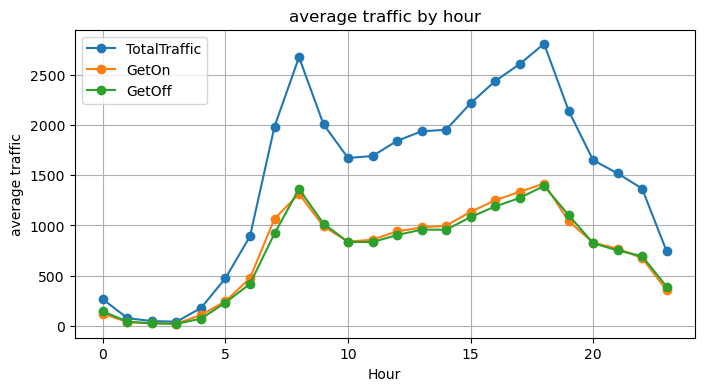

In [ ]:
# 전체 시간대 평균 승하차량
hour_stats = node_df.groupby("Hour")[["TotalTraffic","GetOn","GetOff"]].mean()

hour_stats.plot(kind="line", marker="o", figsize=(8,4))
plt.title("average traffic by hour")
plt.ylabel("average traffic")
plt.grid(True)
plt.show()

In [ ]:
# 노드별 하루 총 승하차량 (24시간 합)
node_daily = node_df.groupby("osmid")[["TotalTraffic","GetOn","GetOff"]].sum()
node_daily.sort_values("TotalTraffic", ascending=False).head(10)

,TotalTraffic,GetOn,GetOff
osmid,,,
1835967330,1073275.0,453264.0,620011.0
436868004,954686.0,459548.0,495138.0
7062459938,861472.0,434854.0,426618.0
1939144058,799604.0,453149.0,346455.0
13227913200,566935.0,356622.0,210313.0
13049399763,528608.0,265664.0,262944.0
12208571853,519571.0,293344.0,226227.0
732440442,504153.0,285386.0,218767.0
8551941370,474818.0,246602.0,228216.0


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

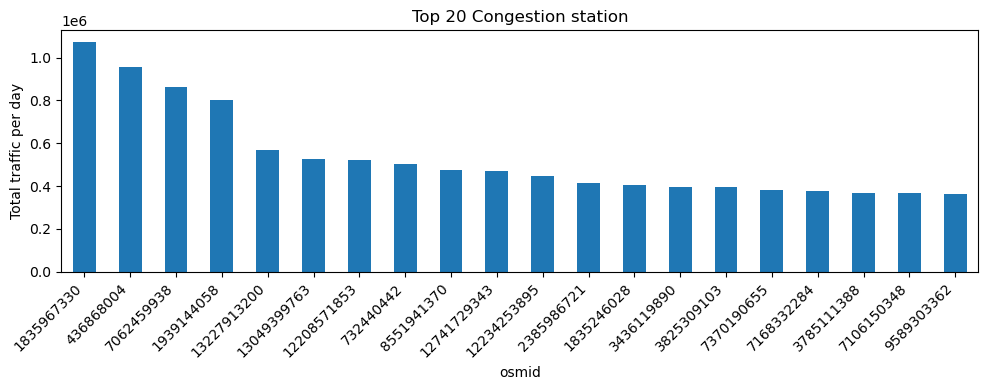

In [ ]:
topk = 20
top_nodes = node_daily.sort_values("TotalTraffic", ascending=False).head(topk)

top_nodes["TotalTraffic"].plot(kind="bar", figsize=(10,4))
plt.title(f"Top {topk} Congestion station")
plt.ylabel("Total traffic per day")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 서울시 노드 정보 데이터

In [50]:
import fiona
fiona.listlayers(gpkg_path)

['nodes', 'edges']

In [51]:
edges_gdf = gpd.read_file(gpkg_path, layer="edges")
nodes_gdf = gpd.read_file(gpkg_path, layer="nodes")

edges_gdf.head(), edges_gdf.info()
nodes_gdf.head(), nodes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 103620 entries, 0 to 103619
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   u         103620 non-null  int64   
 1   v         103620 non-null  int64   
 2   key       103620 non-null  int64   
 3   osmid     103620 non-null  object  
 4   highway   103620 non-null  object  
 5   name      103620 non-null  object  
 6   oneway    103620 non-null  bool    
 7   reversed  103620 non-null  object  
 8   length    103620 non-null  float64 
 9   from      103620 non-null  int64   
 10  to        103620 non-null  int64   
 11  lanes     103620 non-null  object  
 12  maxspeed  103620 non-null  object  
 13  ref       103620 non-null  object  
 14  bridge    103620 non-null  object  
 15  tunnel    103620 non-null  object  
 16  junction  103620 non-null  object  
 17  access    103620 non-null  object  
 18  width     103620 non-null  object  
 19  service   10362

(       osmid          y           x  street_count junction highway ref  \
 0  266813237  37.526615  127.000794             3                        
 1  278159482  37.525964  126.997422             3                        
 2  278159676  37.527696  127.002375             3                        
 3  282723724  37.588055  127.023541             3                        
 4  282723780  37.586624  127.025199             3                        
 
   railway                    geometry  
 0          POINT (127.00079 37.52662)  
 1          POINT (126.99742 37.52596)  
 2           POINT (127.00238 37.5277)  
 3          POINT (127.02354 37.58805)  
 4           POINT (127.0252 37.58662)  ,
 None)

In [ ]:
# 좌표계 확인 (위경도)
print(edges_gdf.crs)
print(nodes_gdf.crs)

EPSG:4326
EPSG:4326


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

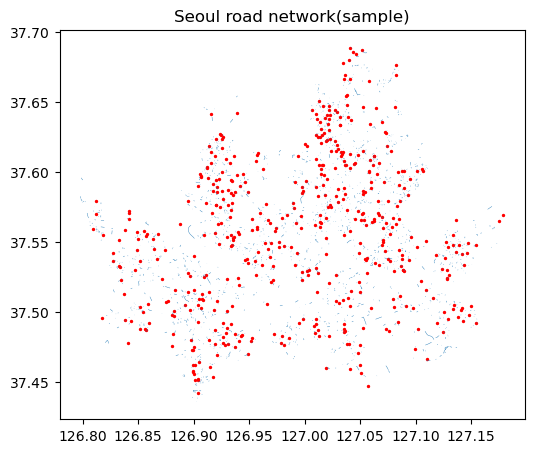

In [ ]:
ax = edges_gdf.sample(min(2000, len(edges_gdf))).plot(figsize=(6,6), linewidth=0.3)
nodes_gdf.sample(min(500, len(nodes_gdf))).plot(ax=ax, markersize=2, color="red")
plt.title("Seoul road network(sample)")
plt.show()

### 데이터 조인

In [46]:
nodes_gdf.columns

Index(['osmid', 'y', 'x', 'street_count', 'junction', 'highway', 'ref',
       'railway', 'geometry'],
      dtype='object')

In [47]:
# 노드 좌표만 추출
node_xy = nodes_gdf[["osmid", "geometry"]].copy()

# 시계열 데이터와 merge (각 osmid의 Hour별 데이터가 좌표를 가지게 됨)
node_with_geo = node_df.merge(node_xy, on="osmid", how="left")

node_with_geo["geometry"].isna().mean()  # 좌표 없는 행 비율

node_with_geo

,osmid,Hour,TotalTraffic,GetOn,GetOff,RouteCount,geometry
0,282723804,0,179.0,116.0,63.0,1.0,POINT (127.0253 37.58656)
1,282723804,1,0.0,0.0,0.0,1.0,POINT (127.0253 37.58656)
2,282723804,2,0.0,0.0,0.0,1.0,POINT (127.0253 37.58656)
3,282723804,3,0.0,0.0,0.0,1.0,POINT (127.0253 37.58656)
4,282723804,4,639.0,61.0,578.0,1.0,POINT (127.0253 37.58656)
...,...,...,...,...,...,...,...
176515,13284318372,19,264.0,29.0,235.0,1.0,POINT (127.05534 37.61255)
176516,13284318372,20,106.0,12.0,94.0,1.0,POINT (127.05534 37.61255)
176517,13284318372,21,99.0,12.0,87.0,1.0,POINT (127.05534 37.61255)
176518,13284318372,22,88.0,7.0,81.0,1.0,POINT (127.05534 37.61255)


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not

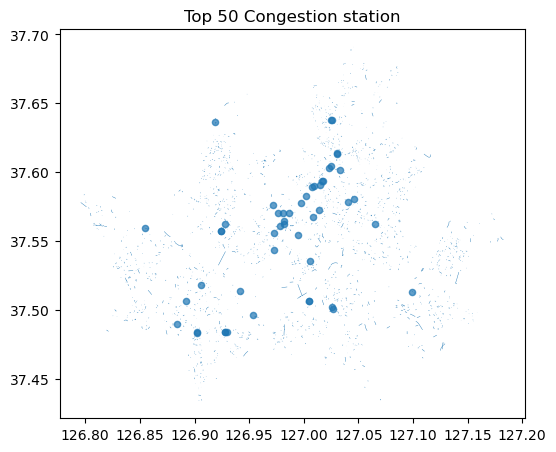

In [48]:
# 지도 위에 가장 바쁜 정류장 찍기 (top 50)

top_nodes_geo = node_with_geo.groupby(["osmid","geometry"])["TotalTraffic"].sum().reset_index()
top_nodes_geo = top_nodes_geo.sort_values("TotalTraffic", ascending=False).head(50)

top_nodes_gdf = gpd.GeoDataFrame(top_nodes_geo, geometry="geometry", crs=nodes_gdf.crs)

ax = edges_gdf.sample(min(2000, len(edges_gdf))).plot(figsize=(6,6), linewidth=0.3)
top_nodes_gdf.plot(ax=ax, markersize=20, alpha=0.7)
plt.title("Top 50 Congestion station")
plt.show()


### osmid -> index 변환

In [52]:
node_df["osmid"] = node_df["osmid"].astype(int)

# 모델에 쓸 "유효 노드 목록" (정렬된 고유 osmid)
valid_nodes = np.sort(node_df["osmid"].unique())
print("노드 개수 N =", len(valid_nodes))

노드 개수 N = 7355


In [61]:
node2idx = {osmid: i for i, osmid in enumerate(valid_nodes)}

# map 을 이용해 osmid → index 변환
node_df["node_idx"] = node_df["osmid"].map(node2idx)

node_df[["osmid","node_idx"]]


,osmid,node_idx
0,282723804,0
1,282723804,0
2,282723804,0
3,282723804,0
4,282723804,0
...,...,...
176515,13284318372,7354
176516,13284318372,7354
176517,13284318372,7354
176518,13284318372,7354


In [62]:
nodes_gdf["osmid"] = nodes_gdf["osmid"].astype(int)

# 그래프에 실제로 쓸 노드만 필터링
nodes_gdf = nodes_gdf[nodes_gdf["osmid"].isin(valid_nodes)].copy()

nodes_gdf["node_idx"] = nodes_gdf["osmid"].map(node2idx)

nodes_gdf[["osmid","node_idx"]]

,osmid,node_idx
5,282723804,0
6,282723942,1
9,287287152,2
13,287299094,3
20,287600535,4
...,...,...
68318,13236318521,7350
68322,13238957909,7351
68324,13239386673,7352
68326,13239391603,7353


In [63]:
# 인덱스 테이블 저장
idx_df = pd.DataFrame({
    "node_idx": np.arange(len(valid_nodes)),
    "osmid": valid_nodes
})

idx_df.to_csv(data_dir / "node_index_map.csv", index=False)


### 인접 행렬 A 생성

In [65]:
import scipy.sparse as sp

gpkg_path = data_dir / "seoul_drive_net.gpkg"

# 1) edges 레이어 읽기
edges_gdf = gpd.read_file(gpkg_path, layer="edges")

# u, v 가 정수 osmid 라고 가정 (지금 gpkg가 그렇게 되어 있음)
edges_gdf["u"] = edges_gdf["u"].astype(int)
edges_gdf["v"] = edges_gdf["v"].astype(int)

# 2) 우리가 가진 시계열 노드(valid_nodes)에 해당하는 간선만 남기기
valid_set = set(valid_nodes)
mask = edges_gdf["u"].isin(valid_set) & edges_gdf["v"].isin(valid_set)
edges_sub = edges_gdf[mask].copy()

print("원래 edge 수:", len(edges_gdf))
print("버스 데이터와 겹치는 edge 수:", len(edges_sub))
edges_sub.head()[["u","v","length","oneway"]]


원래 edge 수: 103620
버스 데이터와 겹치는 edge 수: 3218


,u,v,length,oneway
16,282723804,282723942,37.109885,False
41,287299094,287671330,47.747399,False
43,287299094,436860292,93.721064,False
100,287631232,287712330,15.333853,False
141,287712330,5871218814,82.777407,True


In [ ]:
# osmid → node_idx
edges_sub["u_idx"] = edges_sub["u"].map(node2idx)
edges_sub["v_idx"] = edges_sub["v"].map(node2idx)

# 잘 매핑됐는지 확인
edges_sub[["u","v","u_idx","v_idx"]]

,u,v,u_idx,v_idx
16,282723804,282723942,0,1
41,287299094,287671330,3,6
43,287299094,436860292,3,646
100,287631232,287712330,5,7
141,287712330,5871218814,7,6258
...,...,...,...,...
103570,13208298986,13208298987,7325,7326
103588,13231411180,13231411181,7343,7344
103590,13231411200,13231439304,7347,7348
103591,13231411200,13231439304,7347,7348


In [70]:
# 희소 인접행렬 만들기 (무가중치, undirected)

N = len(valid_nodes)

row = edges_sub["u_idx"].to_numpy()
col = edges_sub["v_idx"].to_numpy()

# 일단 방향 그래프(한쪽 방향만)
data = np.ones_like(row, dtype=np.float32)
A = sp.coo_matrix((data, (row, col)), shape=(N, N))

# undirected 로 만들기 (A 또는 A^T 중 큰 값 사용)
A_sym = A + A.T.multiply(A.T > A) - A.multiply(A.T > A)

print("노드 수:", N)
print("간선 수(방향성 제거 후 nnz):", A_sym.nnz)


노드 수: 7355
간선 수(방향성 제거 후 nnz): 6358


In [71]:
# 3-4. self-loop 추가 + 정규화 
# GCN 계열에서 많이 쓰는 방식

# 1) self-loop 추가
I = sp.eye(N, format="coo")
A_tilde = A_sym + I

# 2) degree 벡터
deg = np.array(A_tilde.sum(axis=1)).flatten()  # 각 노드 degree
deg_inv_sqrt = 1.0 / np.sqrt(deg)
deg_inv_sqrt[np.isinf(deg_inv_sqrt)] = 0.0

D_inv_sqrt = sp.diags(deg_inv_sqrt)

# 3) 정규화 인접행렬
A_norm = D_inv_sqrt @ A_tilde @ D_inv_sqrt    # sparse matrix 그대로 유지

print(A_norm.shape, A_norm.nnz)



(7355, 7355) 13703


In [72]:
# dense 행렬 저장
# ~7355x7355 -> 약 200MB 정도

A_dense = A_norm.toarray().astype(np.float32)
np.save(data_dir / "adjacency_norm.npy", A_dense)

### 시계열 텐서 X 생성
    목표: X를 [N, T, F] = [노드 수, 시간(24), 피처 수] 형태의 numpy 배열로 만드는 것.

In [73]:
# 노드 수 N
N = node_df["node_idx"].max() + 1

# 시간축 T (보통 0~23)
hours = sorted(node_df["Hour"].unique())
T = len(hours)

# 사용할 피처들
feature_cols = ["TotalTraffic", "GetOn", "GetOff", "RouteCount"]
F = len(feature_cols)

print("N =", N, " / T =", T, " / F =", F)
print("hours:", hours)

N = 7355  / T = 24  / F = 4
hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [76]:
# 텐서 초기화
X = np.zeros((N, T, F), dtype=np.float32)

for feat_i, feat_name in enumerate(feature_cols):
    # (node_idx, Hour) -> 값 매트릭스
    tmp = node_df.pivot(index="node_idx", columns="Hour", values=feat_name)
    
    # node_idx 0~N-1, Hour는 hours 순서로 재정렬/재인덱스
    tmp = tmp.reindex(index=np.arange(N), columns=hours)
    
    # 결측치 있으면 0으로 (원하면 평균, 중간값 등 다른 방식도 가능)
    tmp = tmp.fillna(0.0)
    
    # numpy로 변환해서 X에 넣기 (shape: [N, T])
    X[:, :, feat_i] = tmp.to_numpy(dtype=np.float32)

print("X shape:", X.shape)
# X[i, t, :] → i번 노드, t번째 시간(hours[t] 시)의 [TotalTraffic, GetOn, GetOff, RouteCount] 벡터

X shape: (7355, 24, 4)


In [79]:
# 정규화 (feature scaling)

# 전체 (N, T) 축에 대해 피처별 평균/표준편차
feat_mean = X.reshape(-1, F).mean(axis=0)
feat_std  = X.reshape(-1, F).std(axis=0) + 1e-8  # 0 나눗셈 방지용

X_norm = (X - feat_mean) / feat_std

print("mean:", feat_mean)
print("std:", feat_std)
print("X_norm shape:", X_norm.shape)


mean: [1.4689055e+03 7.4241693e+02 7.2648309e+02 1.0746925e+00]
std: [2.7981125e+03 1.5469423e+03 1.4540483e+03 2.2689451e-01]
X_norm shape: (7355, 24, 4)


In [80]:
# 저장
np.save(data_dir / "X_node_time_features.npy", X)
np.save(data_dir / "X_node_time_features_norm.npy", X_norm)